# 1. ARIMA model fitting

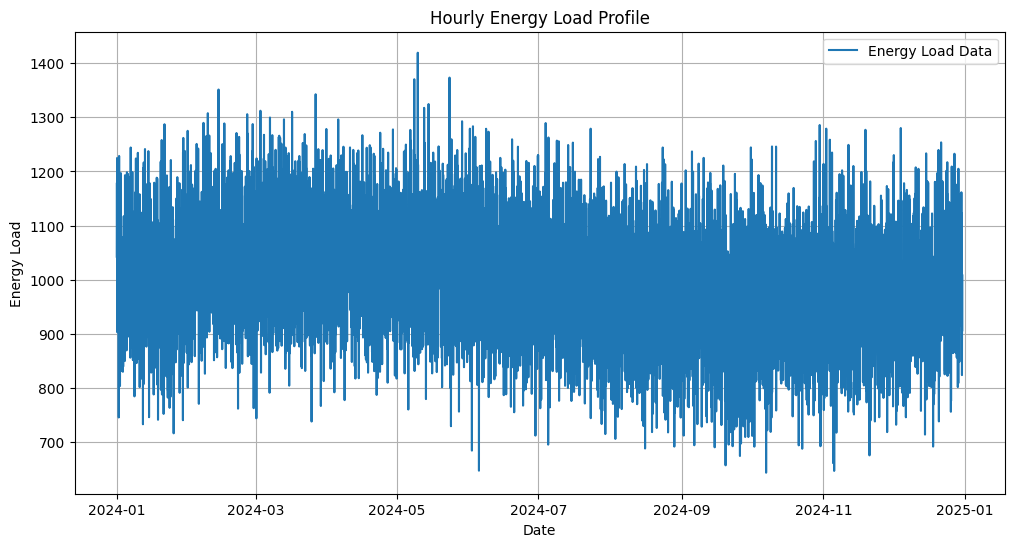

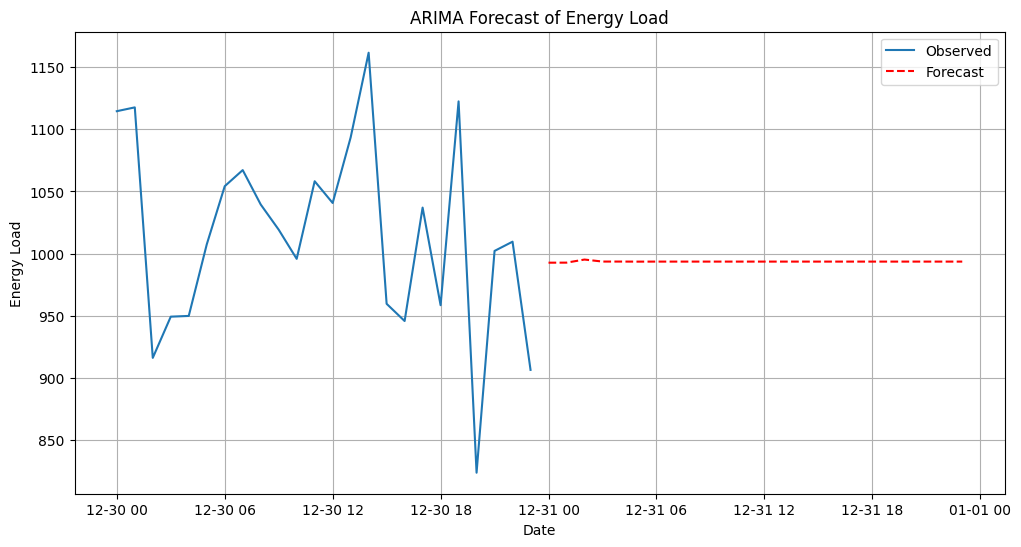

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic hourly energy load data
np.random.seed(0)
hours = pd.date_range(start='2024-01-01', periods=365*24, freq='H')
energy_load = 1000 + 50 * np.sin(2 * np.pi * hours.dayofyear / 365) + np.random.normal(0, 100, size=len(hours))

# Plot the synthetic energy load data
plt.figure(figsize=(12, 6))
plt.plot(hours, energy_load, label='Energy Load Data')
plt.xlabel('Date')
plt.ylabel('Energy Load')
plt.title('Hourly Energy Load Profile')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA model fitting
model = ARIMA(energy_load.values, order=(3, 1, 1))  # Use .values to get the NumPy array instead of the Pandas Series
model_fit = model.fit()

# Forecasting next 24 hours
forecast = model_fit.forecast(steps=24)

# Plot ARIMA forecast
forecast_index = pd.date_range(start=hours[-1] + pd.Timedelta(hours=1), periods=24, freq='H')

plt.figure(figsize=(12, 6))
plt.plot(hours[-24:], energy_load[-24:], label='Observed')
plt.plot(forecast_index, forecast, color='red', linestyle='--', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Load')
plt.title('ARIMA Forecast of Energy Load')
plt.legend()
plt.grid(True)
plt.show()


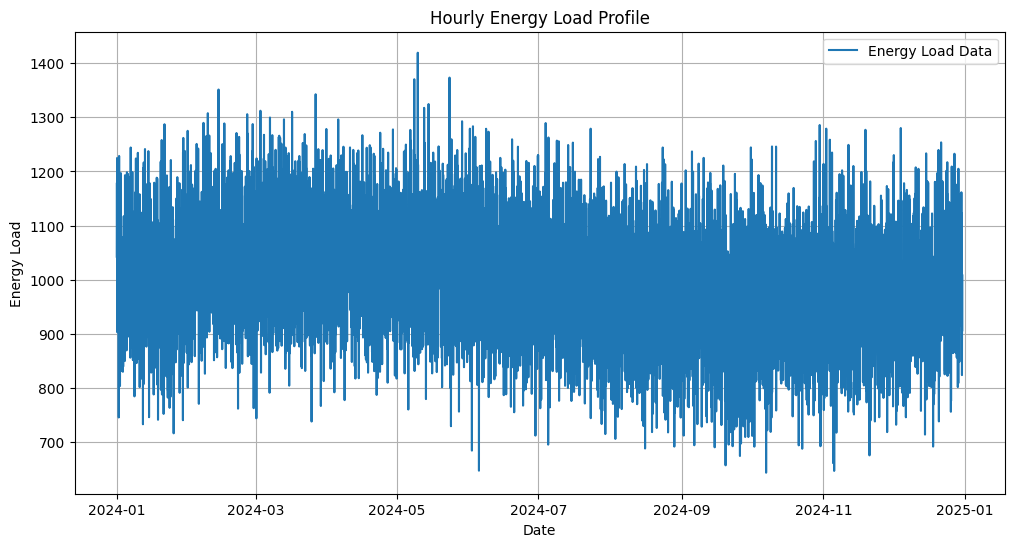

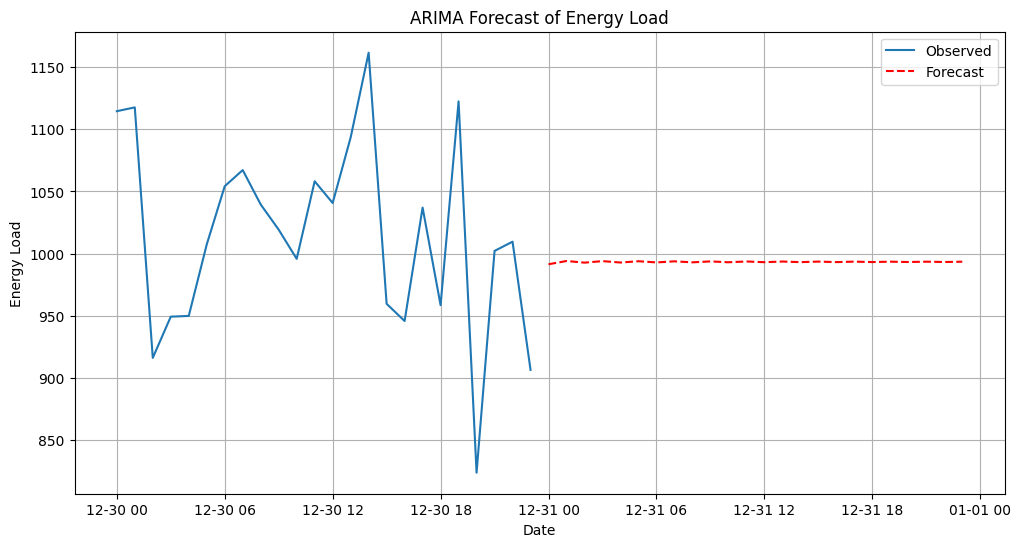

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic hourly energy load data
np.random.seed(0)
hours = pd.date_range(start='2024-01-01', periods=365*24, freq='H')
energy_load = 1000 + 50 * np.sin(2 * np.pi * hours.dayofyear / 365) + np.random.normal(0, 100, size=len(hours))

# Plot the synthetic energy load data
plt.figure(figsize=(12, 6))
plt.plot(hours, energy_load, label='Energy Load Data')
plt.xlabel('Date')
plt.ylabel('Energy Load')
plt.title('Hourly Energy Load Profile')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA model fitting
model = ARIMA(energy_load.values, order=(2, 1, 2))  # Use .values to get the NumPy array instead of the Pandas Series
model_fit = model.fit()

# Forecasting next 24 hours
forecast = model_fit.forecast(steps=24)

# Plot ARIMA forecast
forecast_index = pd.date_range(start=hours[-1] + pd.Timedelta(hours=1), periods=24, freq='H')

plt.figure(figsize=(12, 6))
plt.plot(hours[-24:], energy_load[-24:], label='Observed')
plt.plot(forecast_index, forecast, color='red', linestyle='--', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Load')
plt.title('ARIMA Forecast of Energy Load')
plt.legend()
plt.grid(True)
plt.show()


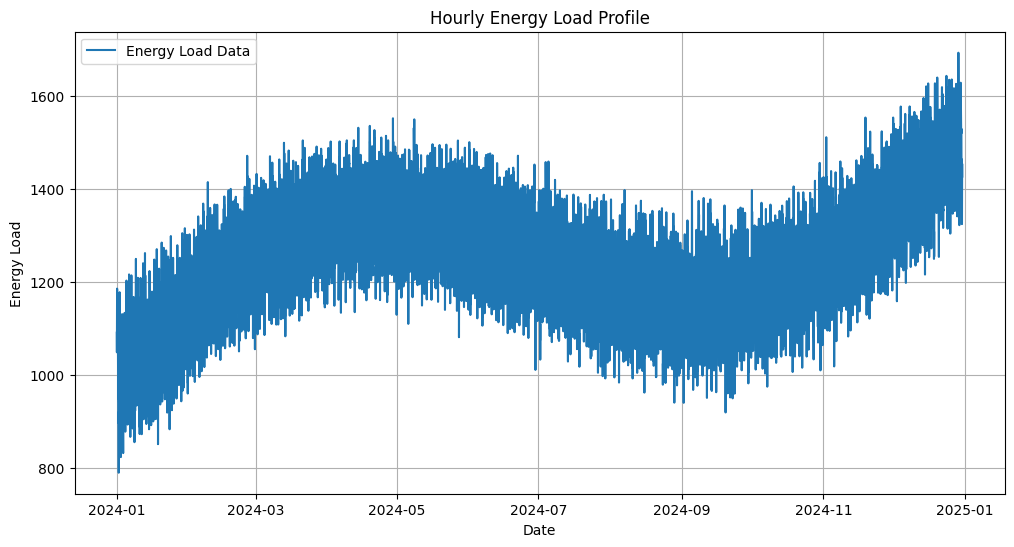

ADF Statistic: -1.40456275122879
p-value: 0.5800867339396595

After differencing:
ADF Statistic: -23.219514538809655
p-value: 0.0
                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 8760
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -46589.377
Date:                          Mon, 15 Jul 2024   AIC                          93188.753
Time:                                  05:50:59   BIC                          93224.129
Sample:                                       0   HQIC                         93200.809
                                         - 8760                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


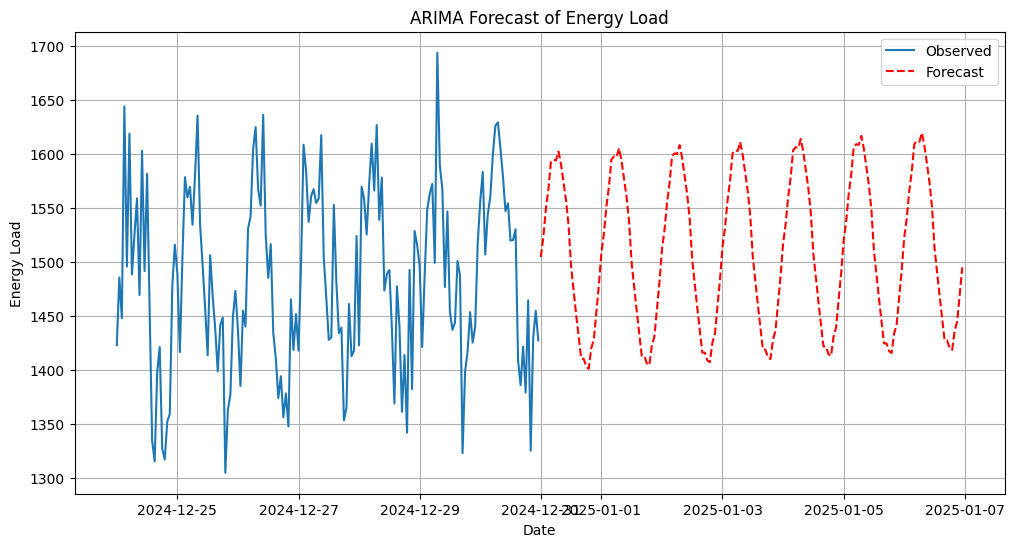

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Generate synthetic hourly energy load data with more complex patterns
np.random.seed(0)
hours = pd.date_range(start='2024-01-01', periods=365*24, freq='H')
trend = np.linspace(1000, 1500, len(hours))
seasonal = 200 * np.sin(2 * np.pi * hours.dayofyear / 365) + 100 * np.sin(2 * np.pi * hours.hour / 24)
noise = np.random.normal(0, 50, size=len(hours))
energy_load = pd.Series(trend + seasonal + noise, index=hours)

# Plot the synthetic energy load data
plt.figure(figsize=(12, 6))
plt.plot(energy_load.index, energy_load.values, label='Energy Load Data')
plt.xlabel('Date')
plt.ylabel('Energy Load')
plt.title('Hourly Energy Load Profile')
plt.legend()
plt.grid(True)
plt.show()

# Check for stationarity
result = adfuller(energy_load.values)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since p-value > 0.05, the series is non-stationary. Let's difference it.
energy_load_diff = energy_load.diff().dropna()

# Check stationarity of differenced series
result = adfuller(energy_load_diff.values)
print('\nAfter differencing:')
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Manually set ARIMA order
# (p, d, q) = (1, 1, 1) for non-seasonal component
# (P, D, Q, s) = (1, 1, 1, 24) for seasonal component (assuming daily seasonality)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)

# Fit the ARIMA model
model = ARIMA(energy_load.values, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

print(model_fit.summary())

# Forecast next 7 days (168 hours)
forecast = model_fit.forecast(steps=168)

# Plot ARIMA forecast
forecast_index = pd.date_range(start=hours[-1] + pd.Timedelta(hours=1), periods=168, freq='H')

plt.figure(figsize=(12, 6))
plt.plot(energy_load.index[-168:], energy_load.values[-168:], label='Observed')
plt.plot(forecast_index, forecast, color='red', linestyle='--', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Load')
plt.title('ARIMA Forecast of Energy Load')
plt.legend()
plt.grid(True)
plt.show()

#2. Wavelet function

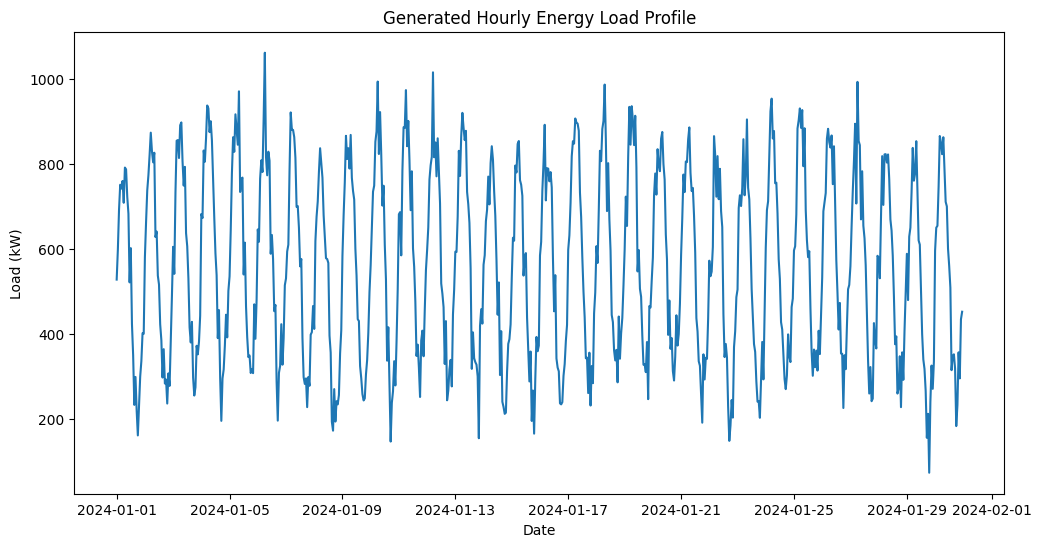

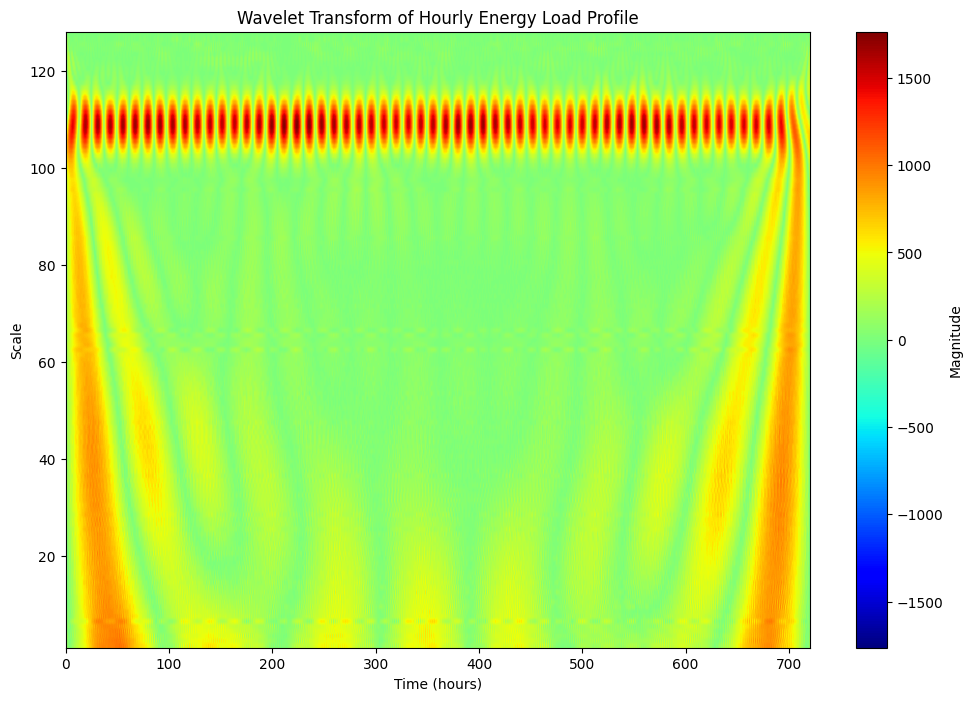

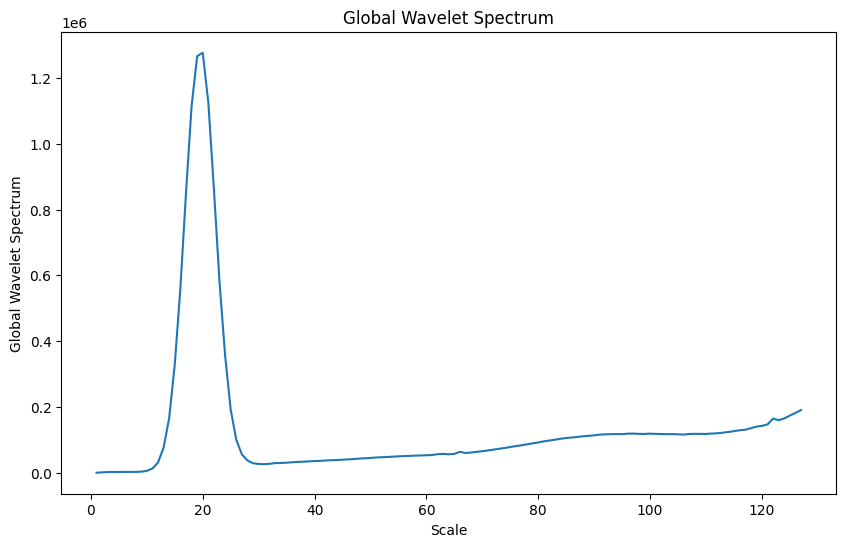

In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Generate sample data
def generate_load(hour, day):
    base_load = 500 + 300 * np.sin(np.pi * hour / 12)  # Daily cycle
    weekly_variation = 100 * np.sin(np.pi * day / 7)  # Weekly cycle
    random_variation = np.random.normal(0, 50)  # Random noise
    return base_load + weekly_variation + random_variation

# Create a datetime index for one month of hourly data
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(hours=i) for i in range(24 * 30)]  # 30 days

# Generate load data
loads = [generate_load(d.hour, d.weekday()) for d in dates]

# Create DataFrame
df = pd.DataFrame({'load': loads}, index=dates)

# Plot the generated data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['load'])
plt.title('Generated Hourly Energy Load Profile')
plt.xlabel('Date')
plt.ylabel('Load (kW)')
plt.show()

# Perform Wavelet Analysis
data = df['load'].values
time = np.arange(len(data))

# Choose wavelet function and scales
wavelet = 'morl'  # Morlet wavelet
scales = np.arange(1, 128)

# Perform CWT
coefficients, frequencies = pywt.cwt(data, scales, wavelet)

# Visualize the results
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(coefficients), extent=[0, len(data), 1, 128], cmap='jet', aspect='auto',
           vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.xlabel('Time (hours)')
plt.title('Wavelet Transform of Hourly Energy Load Profile')
plt.show()

# Calculate and plot the global wavelet spectrum
global_ws = np.sum(np.abs(coefficients)**2, axis=1) / len(data)
plt.figure(figsize=(10, 6))
plt.plot(scales, global_ws)
plt.xlabel('Scale')
plt.ylabel('Global Wavelet Spectrum')
plt.title('Global Wavelet Spectrum')
plt.show()

# 4. Fourier series analysis and Fourier transform

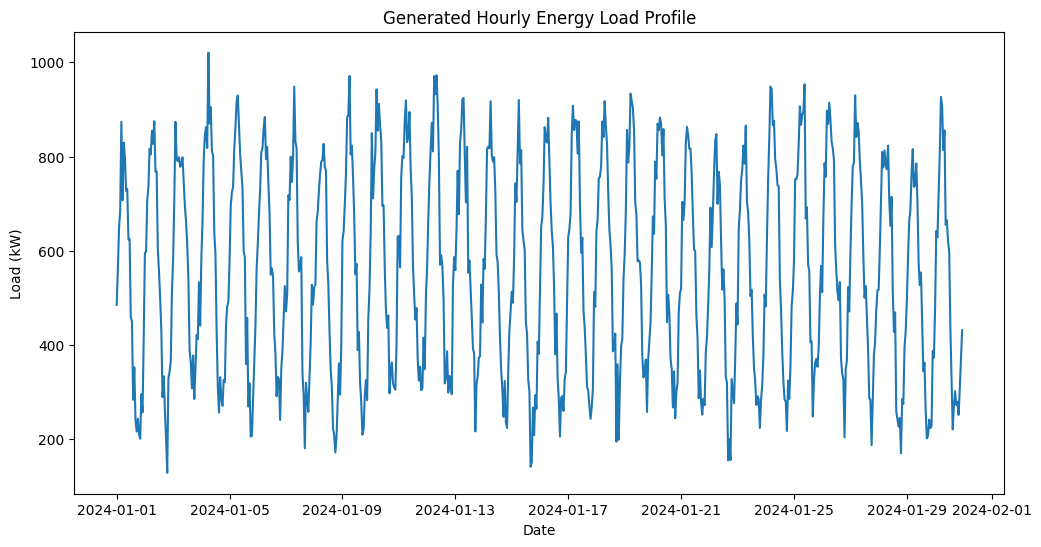

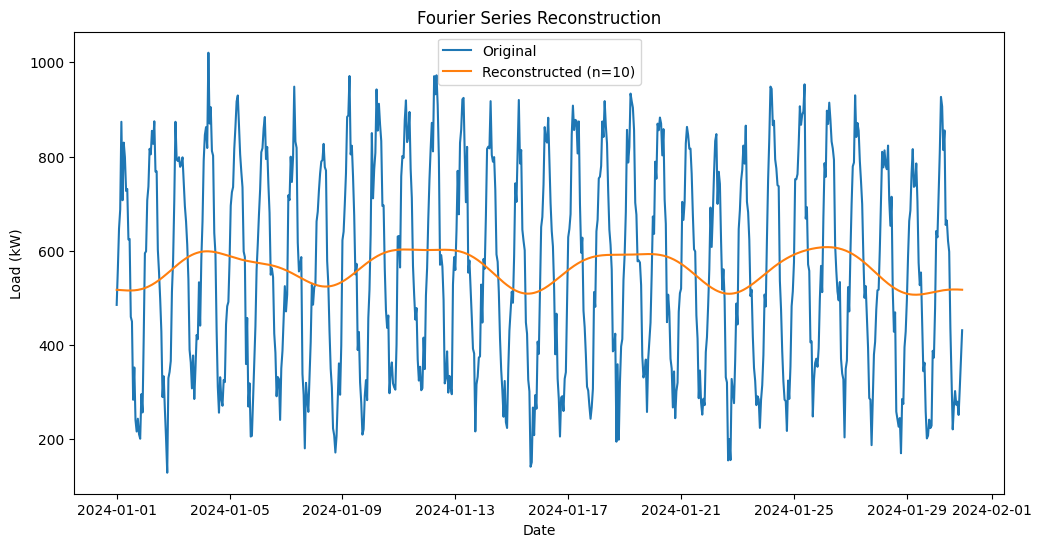

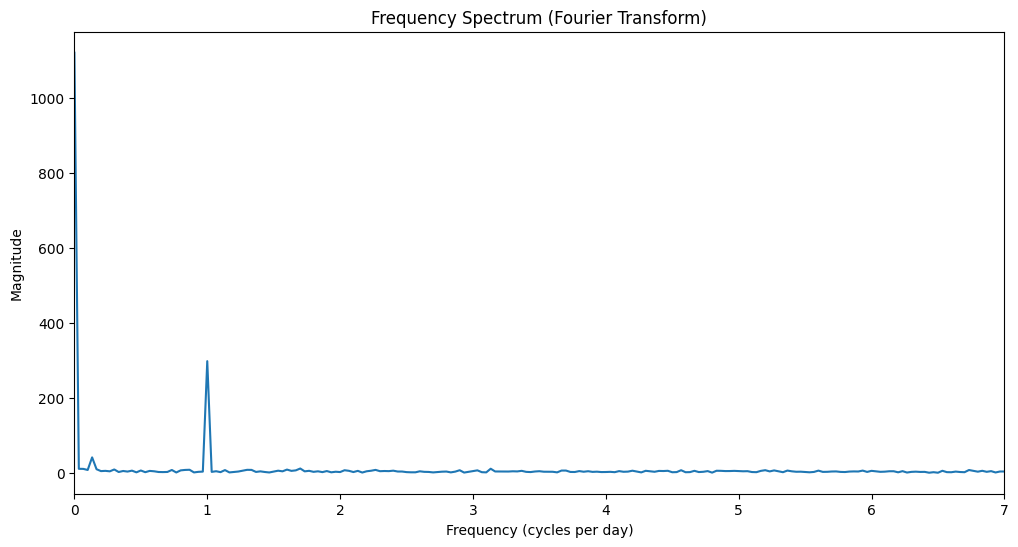

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from datetime import datetime, timedelta

# Generate sample data
def generate_load(hour, day):
    base_load = 500 + 300 * np.sin(np.pi * hour / 12)  # Daily cycle
    weekly_variation = 100 * np.sin(np.pi * day / 7)  # Weekly cycle
    random_variation = np.random.normal(0, 50)  # Random noise
    return base_load + weekly_variation + random_variation

# Create a datetime index for one month of hourly data
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(hours=i) for i in range(24 * 30)]  # 30 days

# Generate load data
loads = [generate_load(d.hour, d.weekday()) for d in dates]

# Create DataFrame
df = pd.DataFrame({'load': loads}, index=dates)

# Plot the generated data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['load'])
plt.title('Generated Hourly Energy Load Profile')
plt.xlabel('Date')
plt.ylabel('Load (kW)')
plt.show()

# Fourier Series Analysis
def fourier_series(x, n_terms):
    a0 = np.mean(x)
    coeffs = [a0]
    for n in range(1, n_terms + 1):
        an = 2 * np.mean(x * np.cos(2 * np.pi * n * np.arange(len(x)) / len(x)))
        bn = 2 * np.mean(x * np.sin(2 * np.pi * n * np.arange(len(x)) / len(x)))
        coeffs.extend([an, bn])
    return np.array(coeffs)

# Calculate Fourier series coefficients
n_terms = 10
coeffs = fourier_series(df['load'].values, n_terms)

# Reconstruct the signal using Fourier series
t = np.arange(len(df))
reconstructed = coeffs[0] + sum(coeffs[2*i-1] * np.cos(2*np.pi*i*t/len(df)) +
                                coeffs[2*i] * np.sin(2*np.pi*i*t/len(df))
                                for i in range(1, n_terms+1))

# Plot original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['load'], label='Original')
plt.plot(df.index, reconstructed, label=f'Reconstructed (n={n_terms})')
plt.title('Fourier Series Reconstruction')
plt.xlabel('Date')
plt.ylabel('Load (kW)')
plt.legend()
plt.show()

# Fourier Transform
N = len(df)
T = 1.0 / 24  # Sample spacing (1 hour)

yf = fft(df['load'].values)
xf = fftfreq(N, T)[:N//2]

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Frequency Spectrum (Fourier Transform)')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Magnitude')
plt.xlim(0, 7)  # Limit x-axis to 7 cycles per day for better visibility
plt.show()